Title: Stock Market Volatility & Risk Visualization using S&P 500 Index

Objective:
The goal of this project is to analyze historical S&P 500 index data (2014–2024) to understand long-term market trends, short-term volatility, and the impact of major real-world events such as the COVID-19 market crash.

In [42]:
import pandas as pd
import matplotlib.pyplot as plt


In [43]:
df = pd.read_csv("https://raw.githubusercontent.com/Parth-Landge/thermodynamics-calculator/refs/heads/main/sp500_index.csv")

In [44]:
df.head()

,Date,S&P500
0,2014-12-22,2078.54
1,2014-12-23,2082.17
2,2014-12-24,2081.88
3,2014-12-26,2088.77
4,2014-12-29,2090.57


In [45]:
df.tail()

,Date,S&P500
2512,2024-12-16,6074.08
2513,2024-12-17,6050.61
2514,2024-12-18,5872.16
2515,2024-12-19,5867.08
2516,2024-12-20,5930.85


In [46]:
df.shape

(2517, 2)

In [47]:
df['Date'] = pd.to_datetime(df['Date'])
df

,Date,S&P500
0,2014-12-22,2078.54
1,2014-12-23,2082.17
2,2014-12-24,2081.88
3,2014-12-26,2088.77
4,2014-12-29,2090.57
...,...,...
2512,2024-12-16,6074.08
2513,2024-12-17,6050.61
2514,2024-12-18,5872.16
2515,2024-12-19,5867.08


In [26]:
df.rename(columns={'S&P500':'sp500'},inplace=True)

In [27]:
df.set_index('Date', inplace=True)

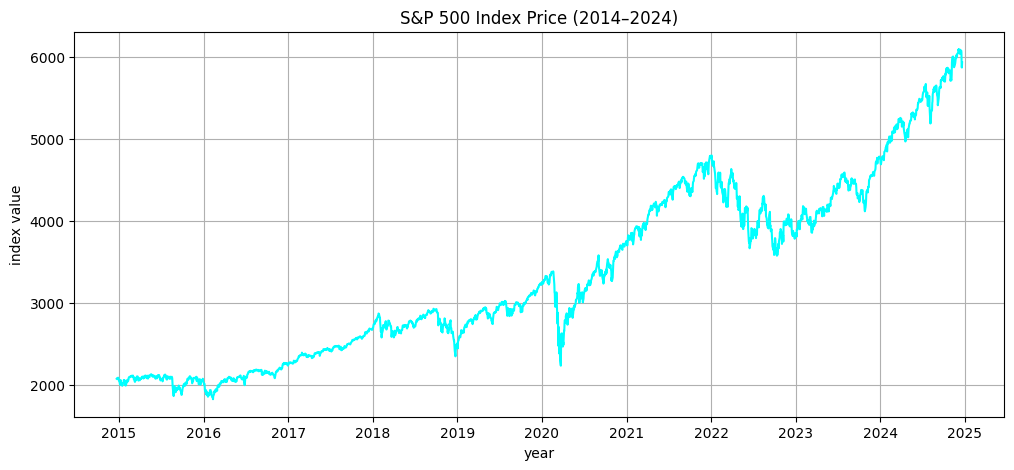

In [28]:
plt.figure(figsize=(12,5))
plt.plot(df.index,df['sp500'],color ="cyan")
plt.grid()
plt.xlabel("year")
plt.ylabel("index value")
plt.title('S&P 500 Index Price (2014–2024)')
plt.show()

Converted the Date column into datetime format
Plotted index value against time using a line chart

Purpose: 
To observe the long-term trend of the S&P 500 index
To identify major rises, falls, and stable periods over a decade

Observation:
The index shows an overall upward trend, indicating long-term market growth
Short-term drops are visible during economic disturbances
A significant dip is visible around early 2020, corresponding to the COVID-19 pandemic

In [29]:
df['daily_return'] = df['sp500'].pct_change()
df.dropna(inplace=True)


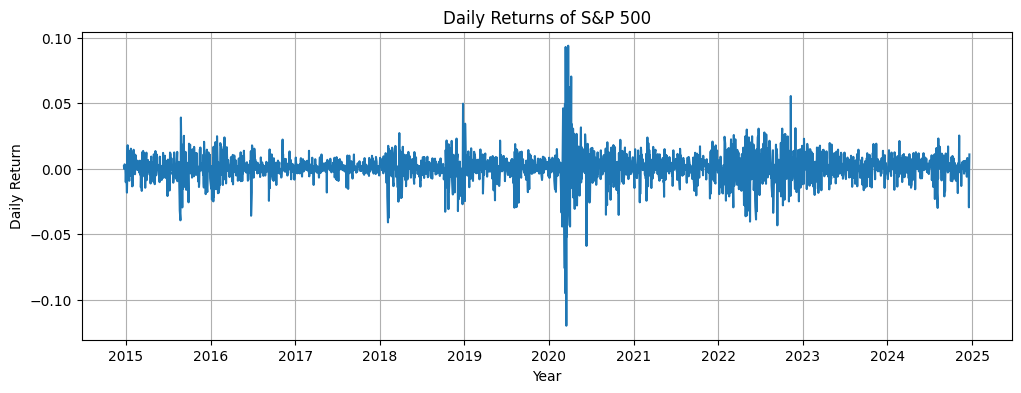

In [30]:
plt.figure(figsize=(12,4))
plt.plot(df.index, df['daily_return'])
plt.title('Daily Returns of S&P 500')
plt.xlabel('Year')
plt.ylabel('Daily Return')
plt.grid()
plt.show()


In [31]:

df['volatility_30d'] = df['daily_return'].rolling(window=30).std()


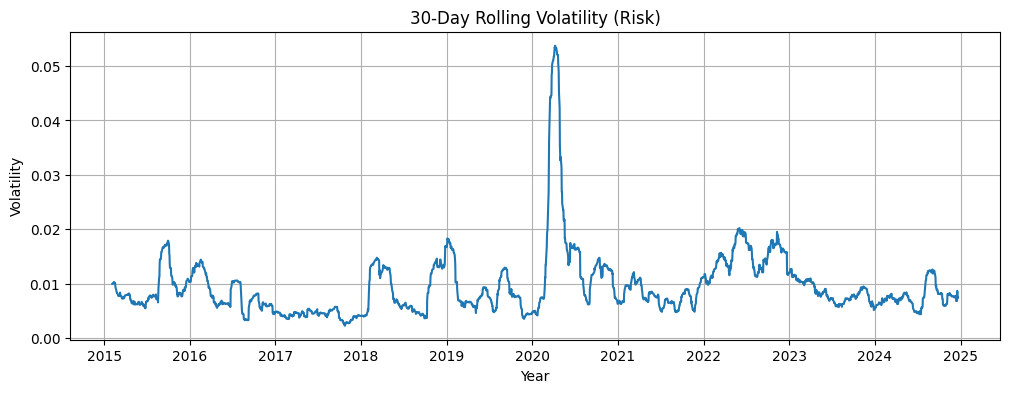

In [32]:
plt.figure(figsize=(12,4))
plt.plot(df.index, df['volatility_30d'])
plt.title('30-Day Rolling Volatility (Risk)')
plt.xlabel('Year')
plt.ylabel('Volatility')
plt.grid()
plt.show()


In [33]:
df["cum max"] = df["sp500"].cummax()
df["drawdown"] = (df["cum max"]-df["sp500"]/df["cum max"])

C:\Users\Parth Landge\AppData\Local\Temp\ipykernel_376\2553161741.py:7: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()


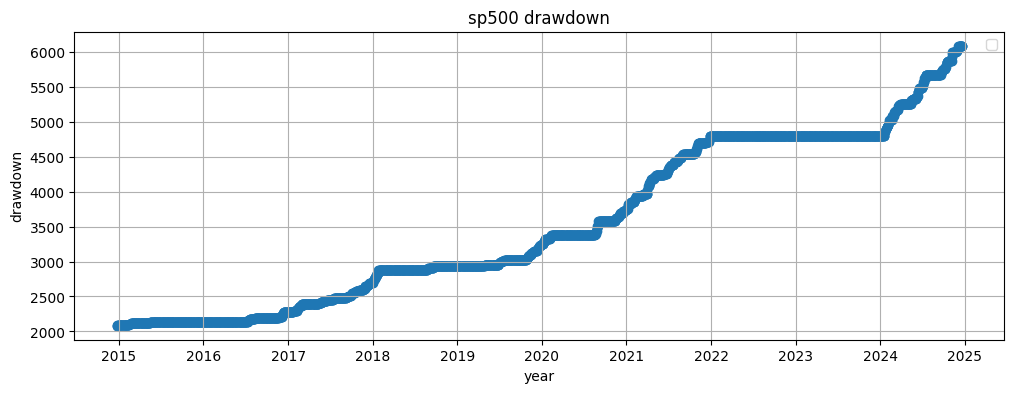

In [34]:
plt.figure(figsize=(12,4))
plt.scatter(df.index,df["drawdown"])
plt.title("sp500 drawdown")
plt.xlabel("year")
plt.ylabel("drawdown")
plt.grid()
plt.legend()
plt.show()

In [38]:
covid_df = df.loc['2020-02-01':'2020-04-30']
covid_df

,sp500,daily_return,volatility_30d,cum max,drawdown
Date,,,,,
2020-02-03,3248.92,0.007255,0.006627,3329.62,3328.644237
2020-02-04,3297.59,0.014980,0.007099,3329.62,3328.629620
2020-02-05,3334.69,0.011251,0.007311,3334.69,3333.690000
2020-02-06,3345.78,0.003326,0.007321,3345.78,3344.780000
2020-02-07,3327.71,-0.005401,0.007418,3345.78,3344.785401
...,...,...,...,...,...
2020-04-24,2836.74,0.013918,0.045389,3386.15,3385.312252
2020-04-27,2878.48,0.014714,0.042341,3386.15,3385.299925
2020-04-28,2863.39,-0.005242,0.035506,3386.15,3385.304382


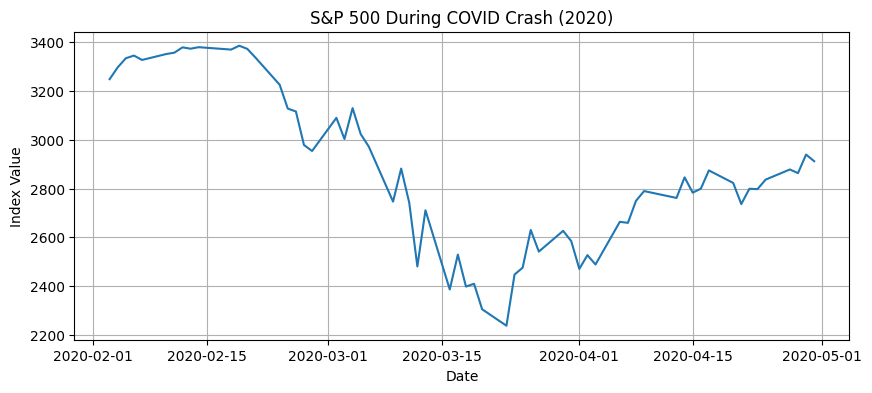

In [40]:
plt.figure(figsize=(10,4))
plt.plot(covid_df.index, covid_df['sp500'])
plt.title('S&P 500 During COVID Crash (2020)')
plt.xlabel('Date')
plt.ylabel('Index Value')
plt.grid()
plt.show()


A specific time slice (February 2020 – April 2020) was selected using date-based indexing
This period was chosen because COVID-19 was a known global economic shock
The index values during this period were plotted separately

Purpose:
To analyze how a major global crisis affected market performance
To visually isolate extreme volatility and sharp drawdowns

Observation:
A rapid and steep decline is observed in March 2020
This reflects panic selling and economic uncertainty during the early pandemic phase
A partial recovery is visible toward April 2020

Conclusion:
This confirms that major real-world events can cause sudden and severe market crashes, which are clearly visible through time-series visualization.

Learnings from the Project
Stock markets generally grow over long periods but are vulnerable to sudden shocksVisualization helps identify trends, volatility, and crisis periods
Event-based slicing (like COVID-19) provides meaningful insights compared to random date selection
This project builds a strong foundation for future work in:
Risk analysis
Volatility modeling
Machine learning on financial time series